# Table of contents
- [pre-check](#pre-check)
- [umap plots](#umap-plots)
    - [RNA only](#RNA-only)
    - [ATAC only](#ATAC-only)
    - [co-embedding](#co-embedding)
    - [case study of mislabelled cells](#case-study-of-mislabelled-cells)
- [cell type distribution across samples](#cell-type-distribution-across-samples)
- [session info](#session-info)

# pre-check

1. set up your own working directory. 
2. make sure the packages are installed: `RColorBrewer`, `ggplot2`, `dplyr`, `tibble`, `vcd`, `ArchR`, `Seurat`, `SeuratDisk`, `uwot`
3. Make sure you've run the script `prepare_taiji_input.r`, then you will have the following files as input:
    - `sample_labeled_v2.h5seurat` for RNA embedding
    - ArchR project folder `sample/` for ATAC embedding
    - Inside the folder `sample/RNAIntegration/GeneIntegrationMatrix/`, file `Save-Block1-JointCCA.rds` stores data for co-embedding.

In [259]:
# set working directories
maindir <- "/home/jupyter/paper_figures/" # needs to be modified
setwd(maindir)

In [ ]:
# import libraries
library(ArchR)
library(Seurat)
library(SeuratDisk)
library(RColorBrewer)
library(uwot)
library(ggplot2)
library(dplyr)
library(vcd)

In [172]:
# set plot parameters, which is suitable for CNS publication
plot.format = theme(
    plot.background=element_blank(),
    panel.grid=element_blank(),
    panel.background=element_blank(),
    panel.border=element_rect(color="black", linewidth=0.5, fill=NA),
    axis.line=element_blank(),
    axis.ticks=element_line(color="black",linewidth=0.5),
    axis.text=element_text(color="black", size=7),
    axis.title=element_text(color="black", size=7),
    plot.title=element_text(color="black", size=7),
    legend.background=element_blank(),
    legend.key=element_blank(),
    legend.text=element_text(color="black", size=7),
    legend.title=element_text(color="black", size=7))

In [2]:
# set cell types of interest
selected_cell_states <- c("B memory", "B naive", "CD14 Mono", "CD16 Mono","CD4 Naive","CD8 Naive","CD4 TCM","CD8 TEM","MAIT","NK","Treg")

# umap plots

We use one sample to visualize the umap plot of embeddings.

In [13]:
# input files
rna_file <- "cache/350f6167-4406-459a-96d3-8d67f6e139a1/B046-P1_PB00443-01_2021-02-24T00:12:47.912386239Z_labeled_v2.h5seurat"
proj_name <- "B111_PB00443" # make sure the folder exists
emb_file <- paste0(proj_name,"/RNAIntegration/GeneIntegrationMatrix/Save-Block1-JointCCA-cluster.rds")

# set color palette
mycolors <- RColorBrewer::brewer.pal(11,"Paired")
names(mycolors) <- selected_cell_states

## RNA only

In [6]:
q <- LoadH5Seurat(rna_file)
proj <- loadArchRProject(proj_name)

Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding miscellaneous information for RNA

Initializing SCT with data

Adding counts for SCT

Adding scale.data for SCT

Adding variable feature information for SCT

Adding miscellaneous information for SCT

Initializing prediction.score.celltype.l1 with data

Adding miscellaneous information for prediction.score.celltype.l1

Initializing prediction.score.celltype.l2 with data

Adding miscellaneous information for prediction.score.celltype.l2

Initializing prediction.score.celltype.l3 with data

Adding miscellaneous information for prediction.score.celltype.l3

Adding reduction ref.spca

Adding cell embeddings for ref.spca

Adding miscellaneous information for ref.spca

Adding command information

Adding cell-level metadata

Adding miscellaneous information

Adding tool-specific results

Successfully loaded ArchRProject!


                                                   / |
                                  

In [7]:
pbmc <- RunUMAP(q, dims = 1:10, reduction = "ref.spca")

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
23:24:34 UMAP embedding parameters a = 0.9922 b = 1.112

23:24:34 Read 21957 rows and found 10 numeric columns

23:24:34 Using Annoy for neighbor search, n_neighbors = 30

23:24:34 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

23:24:37 Writing NN index file to temp file /tmp/RtmpZ7saRk/file6d0cf459f6657

23:24:37 Searching Annoy index using 1 thread, search_k = 3000

23:24:46 Annoy recall = 100%

23:24:47 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors

In [8]:
head(pbmc@meta.data)

,nCount_SCT,nFeature_SCT,orig.ident,nCount_RNA,nFeature_RNA,barcodes,batch_id,cell_name,cell_uuid,chip_id,⋯,seurat_pbmc_type_score,umap_1,umap_2,well_id,predicted.celltype.l1.score,predicted.celltype.l1,predicted.celltype.l2.score,predicted.celltype.l2,predicted.celltype.l3.score,predicted.celltype.l3
,<dbl>,<int>,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>
9fa63d2276f611ebbe1a0a9c4ec18e1b,5047,1785,SeuratProject,4634,1785,9fa63d2276f611ebbe1a0a9c4ec18e1b,B046,inherent_gypsum_tarantula,9fa63d2276f611ebbe1a0a9c4ec18e1b,B046-P1C1,⋯,0.9048852,0.1720667,1.729203,B046-P1C1W1,0.7258304,CD8 T,0.4901866,CD8 TEM,0.3190414,CD8 TEM_3
9fa63e0876f611ebbe1a0a9c4ec18e1b,5483,1856,SeuratProject,5484,1856,9fa63e0876f611ebbe1a0a9c4ec18e1b,B046,crumply_excellent_lion,9fa63e0876f611ebbe1a0a9c4ec18e1b,B046-P1C1,⋯,1.0000000,1.1724505,3.739627,B046-P1C1W1,0.9627335,CD4 T,0.8088445,CD4 TCM,0.7528724,CD4 TCM_3
9fa657bc76f611ebbe1a0a9c4ec18e1b,4887,1234,SeuratProject,2911,1225,9fa657bc76f611ebbe1a0a9c4ec18e1b,B046,nitpicking_scaly_thrasher,9fa657bc76f611ebbe1a0a9c4ec18e1b,B046-P1C1,⋯,1.0000000,9.2664347,1.108109,B046-P1C1W1,0.9981250,Mono,0.9981250,CD14 Mono,0.9981250,CD14 Mono
9fa65a1e76f611ebbe1a0a9c4ec18e1b,5085,1654,SeuratProject,4641,1654,9fa65a1e76f611ebbe1a0a9c4ec18e1b,B046,culm_boundless_ambushbug,9fa65a1e76f611ebbe1a0a9c4ec18e1b,B046-P1C1,⋯,0.9225433,-0.2474159,1.934753,B046-P1C1W1,0.5675075,other T,0.5675075,MAIT,0.5675075,MAIT
9fa662ac76f611ebbe1a0a9c4ec18e1b,5160,1391,SeuratProject,4746,1391,9fa662ac76f611ebbe1a0a9c4ec18e1b,B046,powellite_asbestous_hawk,9fa662ac76f611ebbe1a0a9c4ec18e1b,B046-P1C1,⋯,0.9165204,-3.4713678,5.517292,B046-P1C1W1,1.0000000,CD4 T,0.7827869,CD4 TCM,0.7827869,CD4 TCM_1
9fa66dec76f611ebbe1a0a9c4ec18e1b,3966,1053,SeuratProject,1433,753,9fa66dec76f611ebbe1a0a9c4ec18e1b,B046,festive_animistic_kudu,9fa66dec76f611ebbe1a0a9c4ec18e1b,B046-P1C1,⋯,1.0000000,1.2338015,-9.162641,B046-P1C1W1,1.0000000,B,0.5834759,B intermediate,0.5686075,B intermediate kappa


In [9]:
q2 <- subset(x=pbmc, cells=rownames(pbmc@meta.data)[which(pbmc@meta.data$predicted.celltype.l2%in%selected_cell_states)])

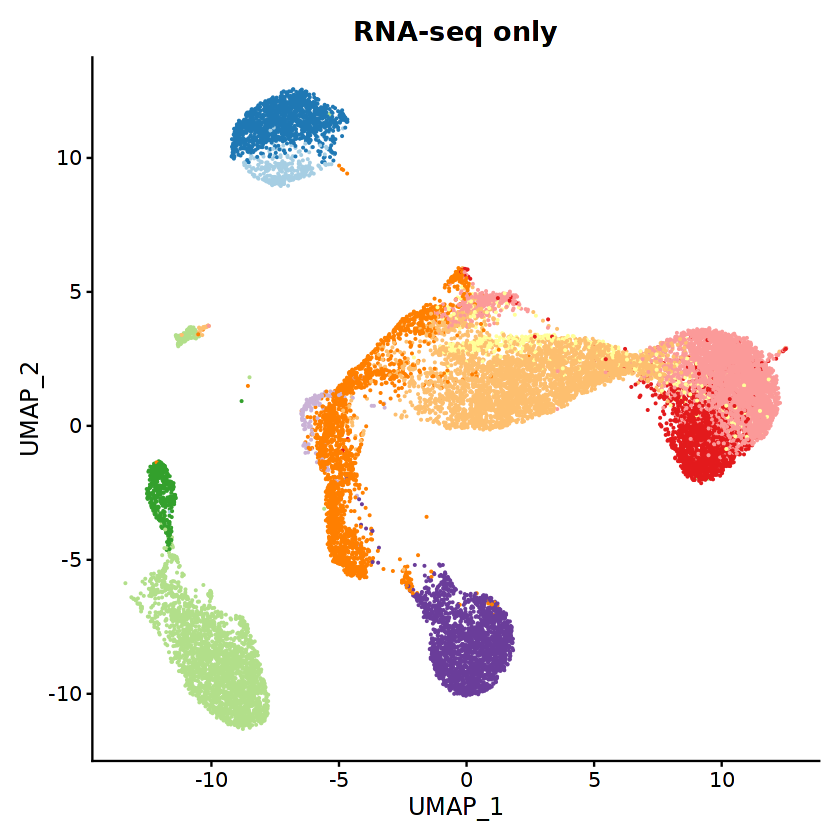

In [10]:
p1 <- DimPlot(q2, reduction = "umap", group.by = "predicted.celltype.l2", cols=mycolors, label.size = 3, repel = TRUE)+ggtitle("RNA-seq only")+NoLegend()
p1

## ATAC only

In [11]:
idxPass <- proj$cellNames[which(proj@cellColData$predictedGroup_Un %in% selected_cell_states)]
proj2 <- proj[idxPass,]

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-6d0cf54b0ddbc-Date-2024-07-01_Time-23-27-45.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-6d0cf54b0ddbc-Date-2024-07-01_Time-23-27-45.log



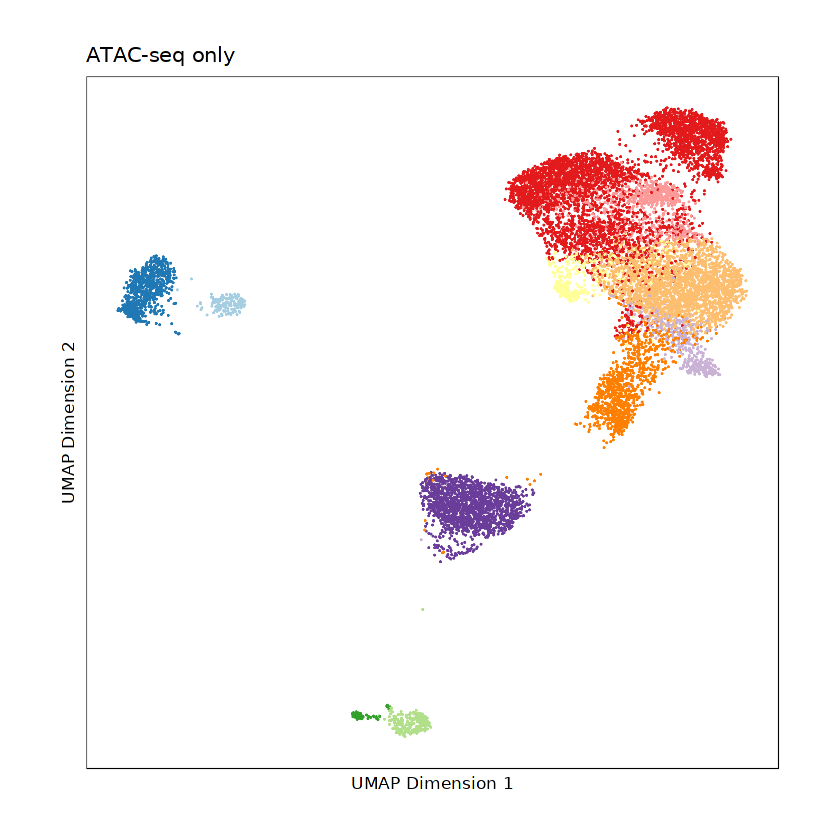

In [13]:
p2 <- plotEmbedding(proj2, colorBy = "cellColData", name = "predictedGroup_Un", pal = mycolors, labelMeans=FALSE)+NoLegend()+ggtitle("ATAC-seq only")
p2

## co-embedding

In [27]:
itg <- readRDS(emb_file) 
itg2 <- itg[which(itg$Group %in% selected_cell_states),]

In [17]:
set.seed(1) # Always do this prior to UMAP
UMAPParams <- list(n_neighbors = 40, min_dist = 0.2, metric="cosine", verbose=FALSE)
UMAPParams$X <- as.data.frame(itg2[, grep("CC_", colnames(itg2))])
UMAPParams$ret_nn <- FALSE
UMAPParams$ret_model <- FALSE
UMAPParams$n_threads <- 1
uwotUmap <- do.call(uwot::umap, UMAPParams)

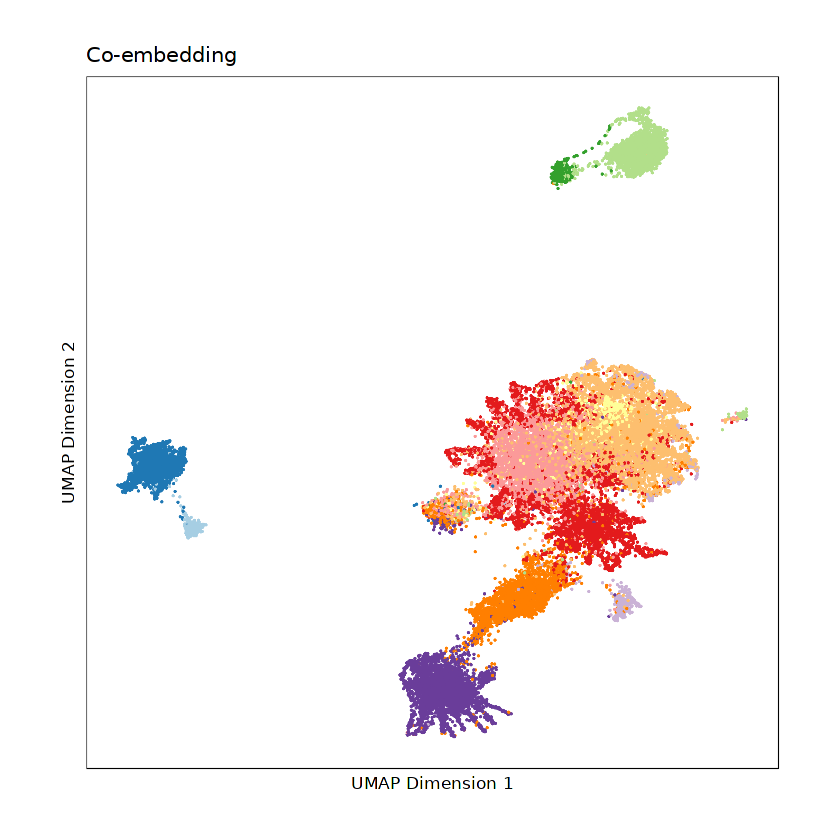

In [18]:
p3 <- ggPoint(
    x = uwotUmap[,1], 
    y = uwotUmap[,2], 
    color = itg2$Group,
    randomize = TRUE, 
    size = 0.2,
    xlabel = "UMAP Dimension 1",
    ylabel = "UMAP Dimension 2",
    rastr = TRUE,
    pal = mycolors,
    labelMeans = FALSE
)+ theme(axis.text.x = element_blank(), axis.ticks.x = element_blank(), 
         axis.text.y = element_blank(), axis.ticks.y = element_blank())+ggtitle("Co-embedding")+NoLegend()
p3

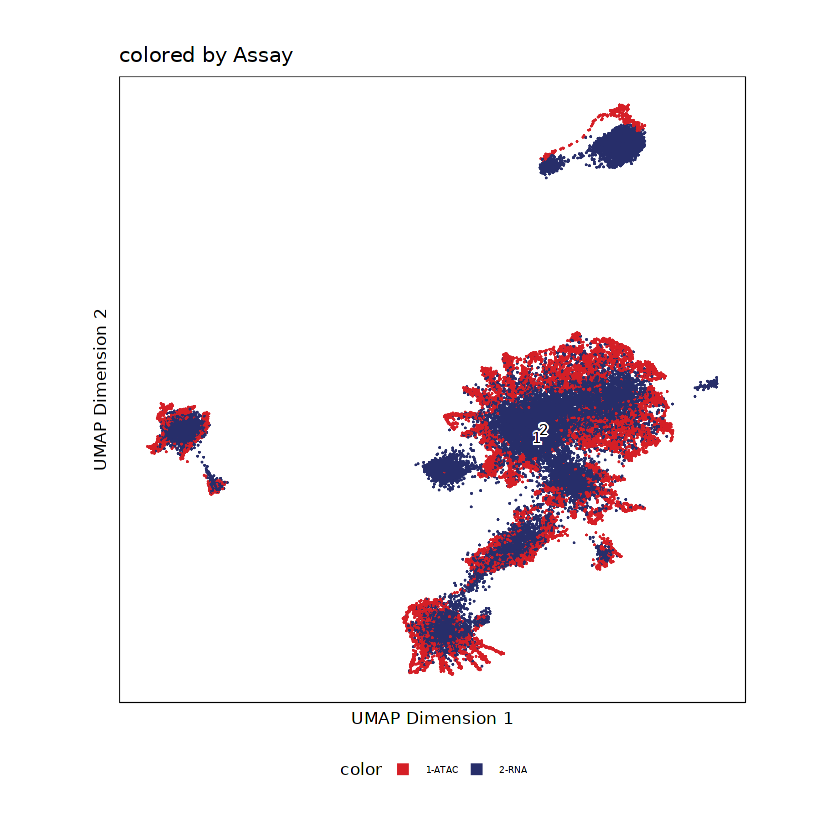

In [19]:
p4 <- ggPoint(
    x = uwotUmap[,1], 
    y = uwotUmap[,2], 
    color = itg2$Assay,
    randomize = TRUE, 
    size = 0.2,
    title = "colored by Assay",
    xlabel = "UMAP Dimension 1",
    ylabel = "UMAP Dimension 2",
    rastr = TRUE
)+ theme(axis.text.x = element_blank(), axis.ticks.x = element_blank(), 
         axis.text.y = element_blank(), axis.ticks.y = element_blank())
p4

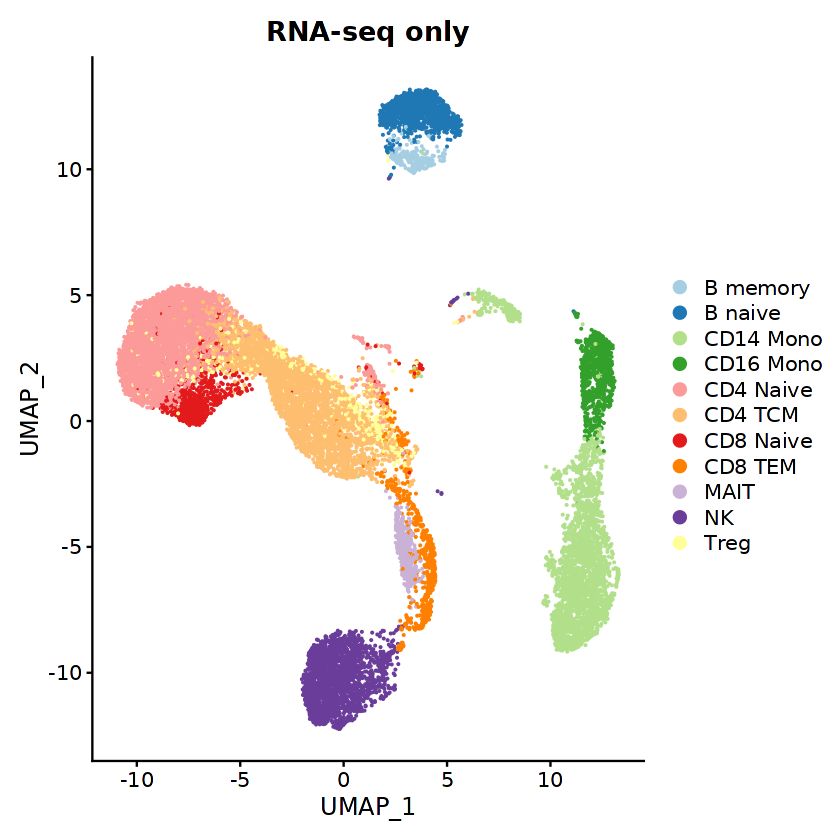

In [312]:
# show legend
p5 <- DimPlot(q2, reduction = "umap", group.by = "predicted.celltype.l2", cols=mycolors, label.size = 3, repel = TRUE)+ggtitle("RNA-seq only")
p5

In [313]:
## save to files
pdf(paste0(proj_name,"/Plot-3UMAPs.pdf"))
print(p1)
print(p2)
print(p3)
print(p4)
print(p5)
dev.off()

png 
  2

## case study of mislabelled cells

Since we labeled each pseudobulk cluster with the most abundant cell types, there're some cells with different cell type annotation from the cluster label. We want to check whether mislabeled cells make sense. For example, in a **CD4 TCM** cluster, there're probably other T cells in this cluster.

In [16]:
# load data
itg3 <- readRDS(emb_file)

In [19]:
cM <- as.matrix(confusionMatrix(itg3$Co_clusters, itg3$Group))
preClust <- colnames(cM)[apply(cM, 1 , which.max)]

In [20]:
data = as.data.frame(colMeans(cM[which(preClust=='CD4 TCM'),])) |> tibble::rownames_to_column('celltype')
names(data)[2] = 'value'
head(data)

,celltype,value
,<chr>,<dbl>
1,CD8 TEM,71.500
2,CD4 TCM,673.625
3,CD14 Mono,1.375
4,MAIT,21.750
5,B intermediate,0.125
6,HSPC,0.000


In [70]:
write.csv(data,paste0(proj_name,'_CD4TCM_cluster_mislabeled_cells.csv'))

In [21]:
# data <- read.csv(paste0(proj_name,'_CD4TCM_cluster_mislabeled_cells.csv'), row.names = 1)
data <- data |> dplyr::filter(celltype%in%selected_cell_states)|>
    mutate(prop=value/sum(data$value)) |> mutate(labels = scales::percent(prop, accuracy = 0.1))
data

celltype,value,prop,labels
<chr>,<dbl>,<dbl>,<chr>
CD8 TEM,71.500,0.0421331762,4.2%
CD4 TCM,673.625,0.3969505009,39.7%
CD14 Mono,1.375,0.0008102534,0.1%
MAIT,21.750,0.0128167354,1.3%
CD4 Naive,444.500,0.2619328226,26.2%
CD8 Naive,266.000,0.1567472009,15.7%
B naive,0.375,0.0002209782,0.0%
NK,2.125,0.0012522098,0.1%
Treg,77.375,0.0455951679,4.6%


In [12]:
mycolors

B memory   B naive CD14 Mono CD16 Mono CD4 Naive CD8 Naive   CD4 TCM   CD8 TEM 
"#A6CEE3" "#1F78B4" "#B2DF8A" "#33A02C" "#FB9A99" "#E31A1C" "#FDBF6F" "#FF7F00" 
     MAIT        NK      Treg 
"#CAB2D6" "#6A3D9A" "#FFFF99"

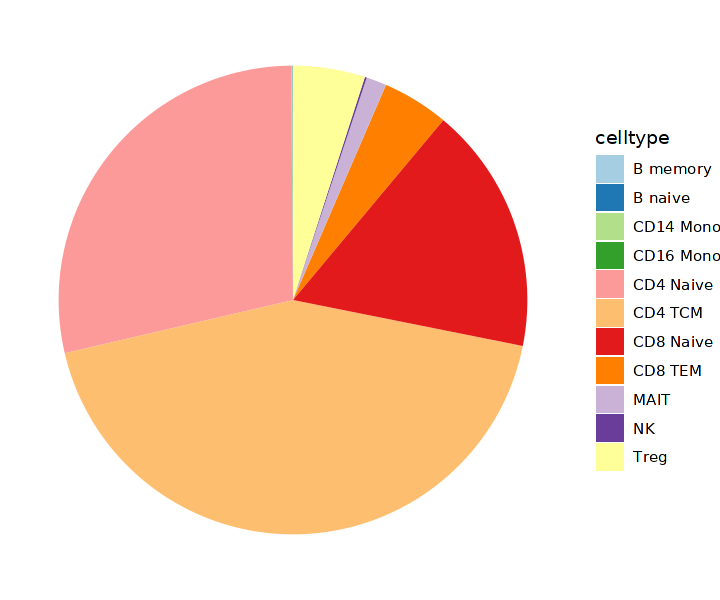

In [41]:
options(repr.plot.width=6, repr.plot.height=5)
p <- ggplot(data, aes(x="", y=value, fill=celltype)) +
    geom_bar(stat="identity", width=1) +
    coord_polar("y", start=0)+theme_void()+
    scale_fill_manual(values = mycolors)
print(p)

In [25]:
pdf(paste0(proj_name,'_CD4TCM_cluster_mislabeled_cells.pdf'))
print(p)
dev.off()

png 
  2

# cell type distribution across samples

In [34]:
df <- read.csv('cell_state_dist_across_samples.csv', row.names = 1)
head(df)

,Var1,per,group3
,<chr>,<dbl>,<chr>
1,B memory,1.40,ERA
2,B naive,5.98,ERA
3,CD14 Mono,10.93,ERA
4,CD16 Mono,3.41,ERA
5,CD4 Naive,29.69,ERA
6,CD4 TCM,20.70,ERA


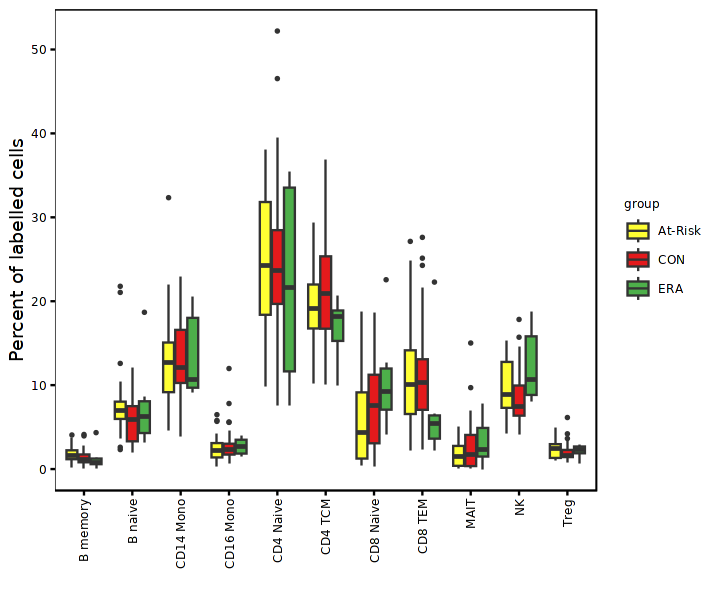

In [53]:
p <- ggplot(df, aes(x = Var1, y = per, fill = group3)) +
    geom_boxplot(outlier.size = 0.5) +
    # geom_dotplot(binaxis='y', stackdir='center', position = position_dodge(1), dotsize = 0.1)+
    labs(x = "", y = "Percent of labelled cells") +
    scale_fill_manual(name="group",values = brewer.pal(8,"Set1")[c(6,1,3)]) +
    theme(
      axis.text.x = element_text(angle=90, vjust=0.5, hjust=1)
    )+plot.format
p

In [56]:
pdf("cell_state_dist_across_samples.pdf", width = 4, height = 3)
print(p)
dev.off()

png 
  2

# session info

In [458]:
sessionInfo()

R version 4.2.2 Patched (2022-11-10 r83330)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/liblapack.so.3

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] stats4    grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] tibble_3.2.1                uwot_0.1.14                
 [3] SeuratDisk_0.0.0.9020       SeuratObject_4.1.3         
 [5] Seurat_4.3.0                rhdf5_2.42.0               
 [7] SummarizedExperiment_1.28.0 MatrixGenerics_1.10.0      
 [9] Rcpp_1.0.9              